# Purpose
Perform descriptive analysis to create a customer profile for each CardioGood Fitness treadmill product line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(palette='colorblind')

In [2]:
df = pd.read_csv('../datasets/CardioGoodFitness.csv')

## Descriptive Statistics and Investigation in the data set

In [3]:
# Explore the first 5 rows
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
# Data types and column names
df.info()

# We have a very clean data set with no missing values. All data types were properly inferred.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
# Descriptive statistics of numerical variables
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
# Descriptive statistics of categorical variables
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


## Initial Observations
The data set is clean, with no missing values and correct inferrence of data types.

There is a wide range in Income (29.6K to 104.6K), Miles (21 to 360).

All datas appear to be relatively normally distributed, with the median really close to the mean, which we'll want to confirm with EDA.

Finally, the data set appears to skew Male (104/180 data points) and Partnered (107/180 data points), which in a ML exercise could require re-balancing, but now still has sufficient amount of data points in alternative categories.

The data types are either objects or integers, though Product, MaritalStatus, Gender, and Fitness strike me as more categorical variables since they have a small, and finite, set of possible values.

## Exploratory Data Analysis
### Distributions

Distribution of the different variables will enable us to identify if we're playing with a normal data set, or if some categories skew towards certain values.

We will use histplot for numerical variables, and countplots for categorical variables


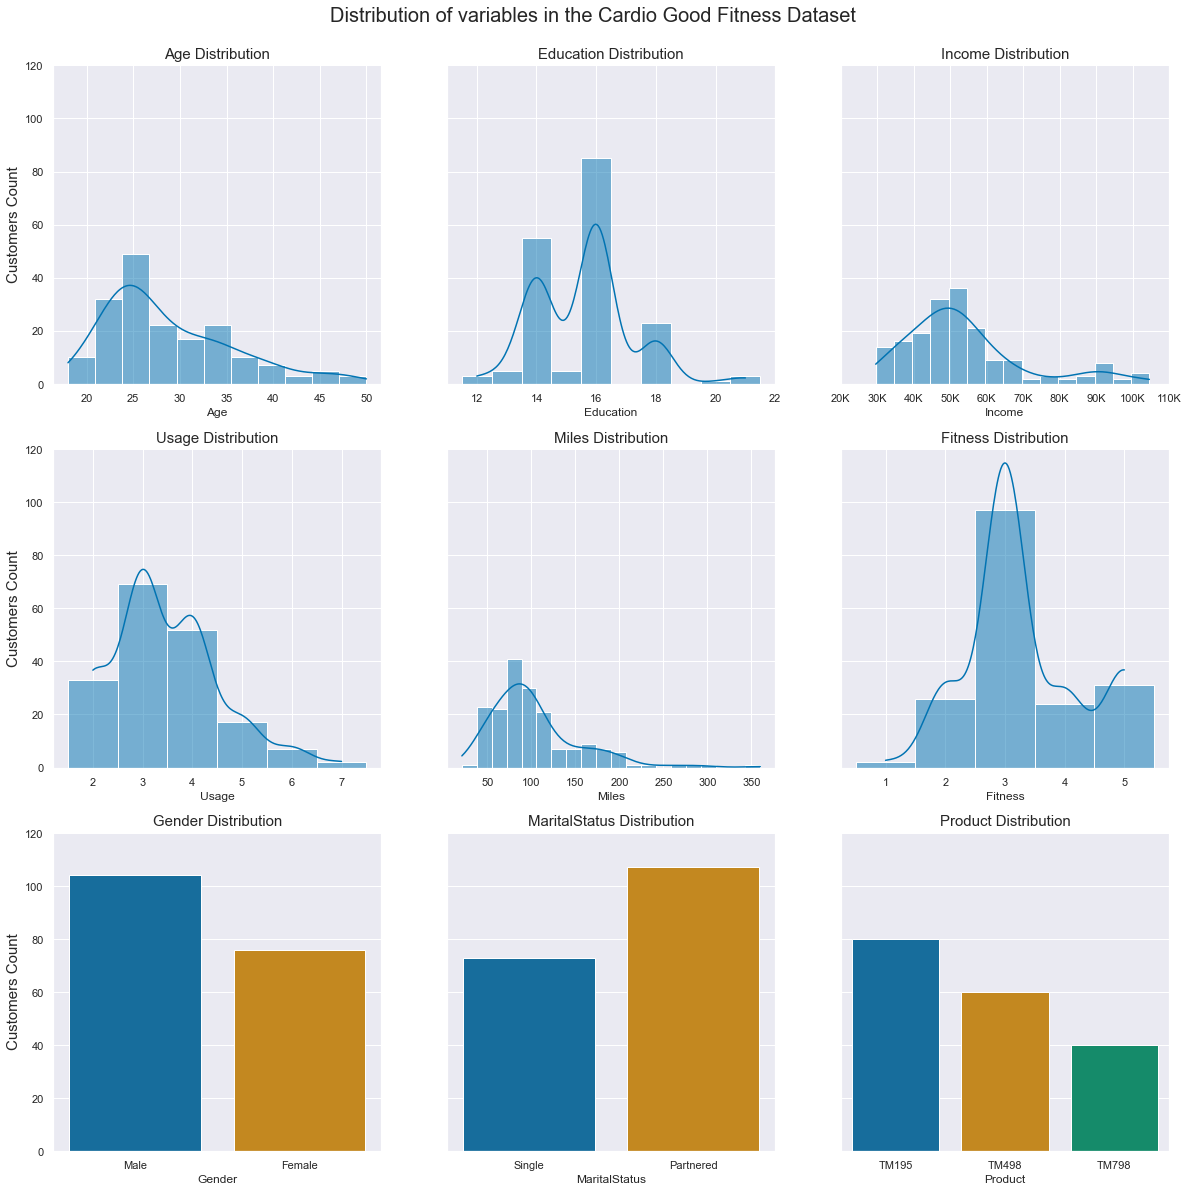

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20), sharey=True)

charts_titles_ft_size = 15
ylabel_txt = 'Customers Count'

# First row
age = sns.histplot(data=df, x='Age', kde=True, ax=ax[0,0])
age.set_title('Age Distribution', fontsize=charts_titles_ft_size)
age.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

education = sns.histplot(data=df, x='Education', kde=True, discrete=True, ax=ax[0,1])
education.set_title('Education Distribution', fontsize=charts_titles_ft_size)

income = sns.histplot(data=df, x='Income', kde=True, ax=ax[0,2])
income.set_title('Income Distribution', fontsize=charts_titles_ft_size)
# Convert income to thousands formatting
income.set_xticks(income.get_xticks().tolist())
income.set_xticklabels(['{}K'.format(int(x/1000)) for x in income.get_xticks().tolist()])

# Second row
usage = sns.histplot(data=df, x='Usage', kde=True, discrete=True, ax=ax[1,0])
usage.set_title('Usage Distribution', fontsize=charts_titles_ft_size)
usage.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

miles = sns.histplot(data=df, x='Miles', kde=True, ax=ax[1,1])
miles.set_title('Miles Distribution', fontsize=charts_titles_ft_size)

fitness = sns.histplot(data=df, x='Fitness', kde=True, discrete=True, ax=ax[1,2])
fitness.set_title('Fitness Distribution', fontsize=charts_titles_ft_size)

# Third row
gender = sns.countplot(data=df, x='Gender', ax=ax[2,0])
gender.set_title('Gender Distribution', fontsize=charts_titles_ft_size)
gender.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

marital_status = sns.countplot(data=df, x='MaritalStatus', ax=ax[2,1])
marital_status.set_title('MaritalStatus Distribution', fontsize=charts_titles_ft_size)
# Remove the ylabel to avoid repetition
marital_status.set_ylabel(None)

product_purchased = sns.countplot(data=df, x='Product', ax=ax[2,2])
product_purchased.set_title('Product Distribution', fontsize=charts_titles_ft_size)
# Remove the ylabel to avoid repetition
product_purchased.set_ylabel(None)

plt.suptitle('Distribution of variables in the Cardio Good Fitness Dataset', y=0.92, fontsize=20)
plt.show()

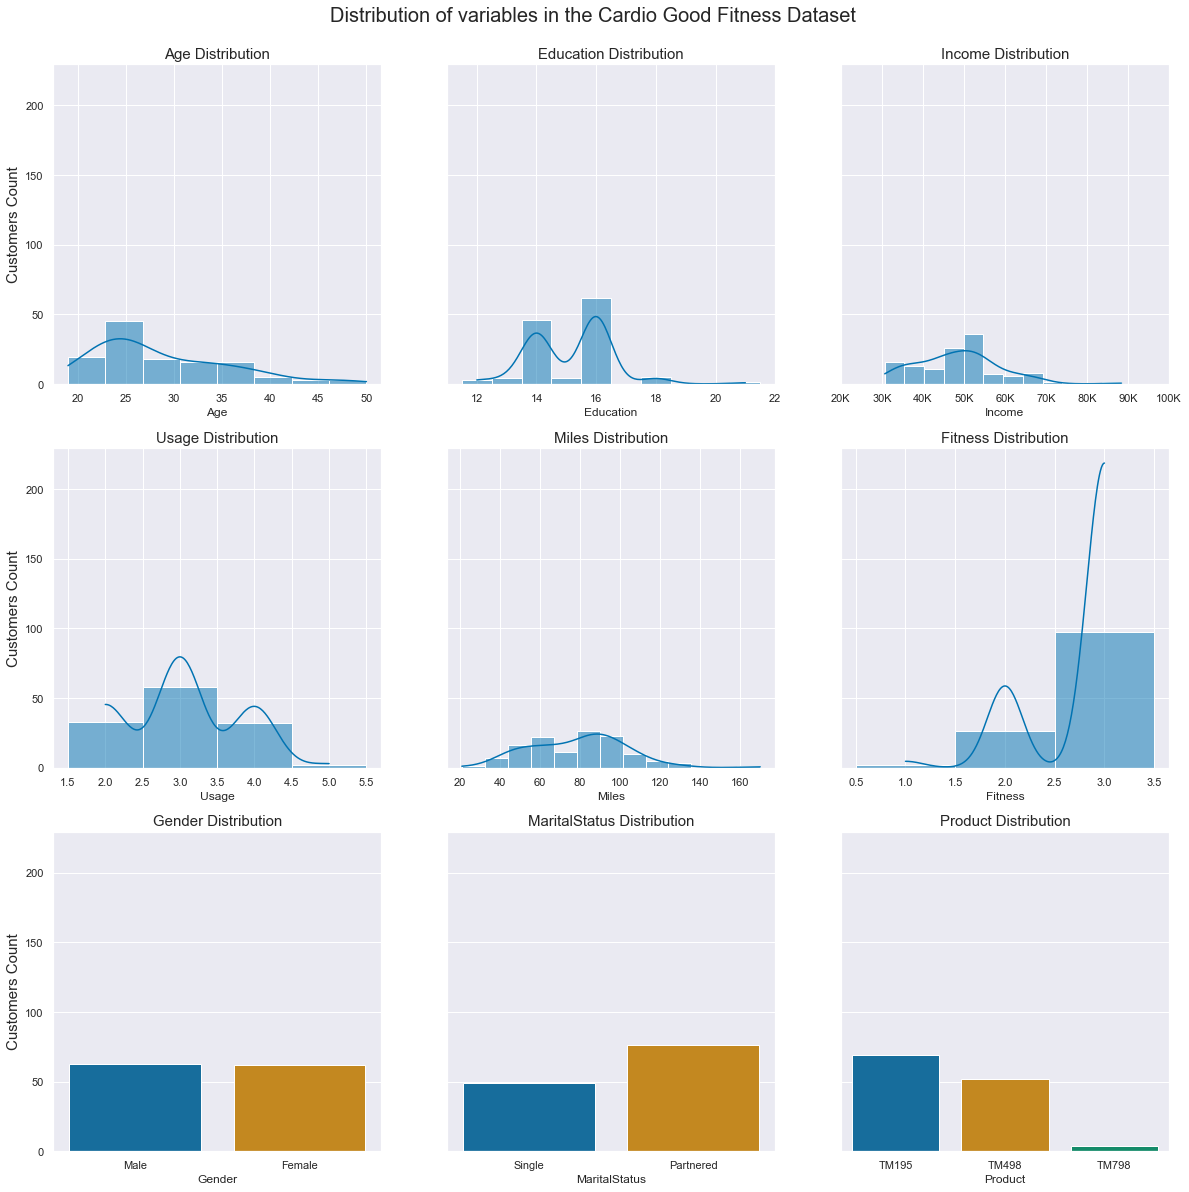

In [8]:
# Excluding high fitness levels

df2 = df[df['Fitness'] < 4]
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20), sharey=True)

charts_titles_ft_size = 15
ylabel_txt = 'Customers Count'

# First row
age = sns.histplot(data=df2, x='Age', kde=True, ax=ax[0,0])
age.set_title('Age Distribution', fontsize=charts_titles_ft_size)
age.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

education = sns.histplot(data=df2, x='Education', kde=True, discrete=True, ax=ax[0,1])
education.set_title('Education Distribution', fontsize=charts_titles_ft_size)

income = sns.histplot(data=df2, x='Income', kde=True, ax=ax[0,2])
income.set_title('Income Distribution', fontsize=charts_titles_ft_size)
# Convert income to thousands formatting
income.set_xticks(income.get_xticks().tolist())
income.set_xticklabels(['{}K'.format(int(x/1000)) for x in income.get_xticks().tolist()])

# Second row
usage = sns.histplot(data=df2, x='Usage', kde=True, discrete=True, ax=ax[1,0])
usage.set_title('Usage Distribution', fontsize=charts_titles_ft_size)
usage.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

miles = sns.histplot(data=df2, x='Miles', kde=True, ax=ax[1,1])
miles.set_title('Miles Distribution', fontsize=charts_titles_ft_size)

fitness = sns.histplot(data=df2, x='Fitness', kde=True, discrete=True, ax=ax[1,2])
fitness.set_title('Fitness Distribution', fontsize=charts_titles_ft_size)

# Third row
gender = sns.countplot(data=df2, x='Gender', ax=ax[2,0])
gender.set_title('Gender Distribution', fontsize=charts_titles_ft_size)
gender.set_ylabel(ylabel_txt, fontsize=charts_titles_ft_size)

marital_status = sns.countplot(data=df2, x='MaritalStatus', ax=ax[2,1])
marital_status.set_title('MaritalStatus Distribution', fontsize=charts_titles_ft_size)
# Remove the ylabel to avoid repetition
marital_status.set_ylabel(None)

product_purchased = sns.countplot(data=df2, x='Product', ax=ax[2,2])
product_purchased.set_title('Product Distribution', fontsize=charts_titles_ft_size)
# Remove the ylabel to avoid repetition
product_purchased.set_ylabel(None)

plt.suptitle('Distribution of variables in the Cardio Good Fitness Dataset', y=0.92, fontsize=20)
plt.show()

### Product Preference among variables
Which product is "preferred" by certain categories of customers? (e.g. Female / Male, Single/Partnered, Fitness level etc.)

We can use countplot to view the category distribution, with passing the hue as the product variable

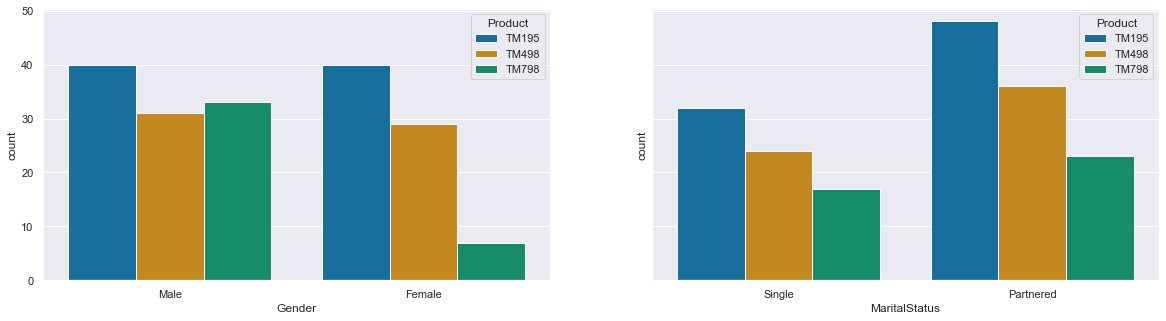

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
sns.countplot(data=df, x='Gender', hue='Product', ax=ax[0])
sns.countplot(data=df, x='MaritalStatus', hue='Product', ax=ax[1])

plt.show()

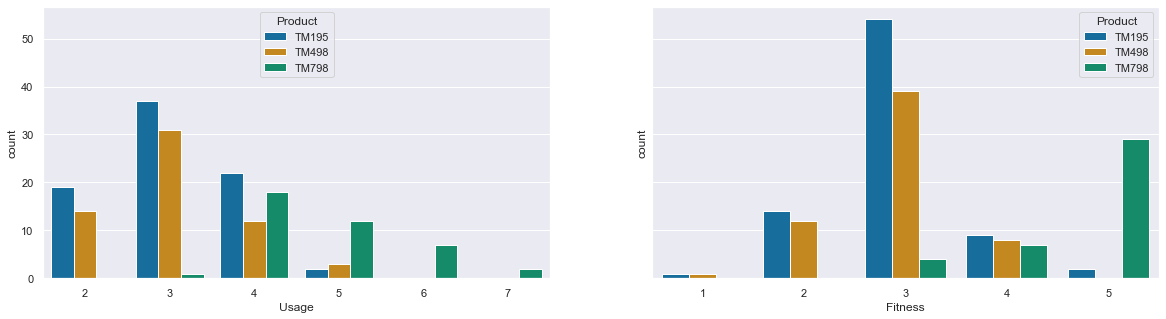

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
sns.countplot(data=df, x='Usage', hue='Product', ax=ax[0])
sns.countplot(data=df, x='Fitness', hue='Product', ax=ax[1])

plt.show()

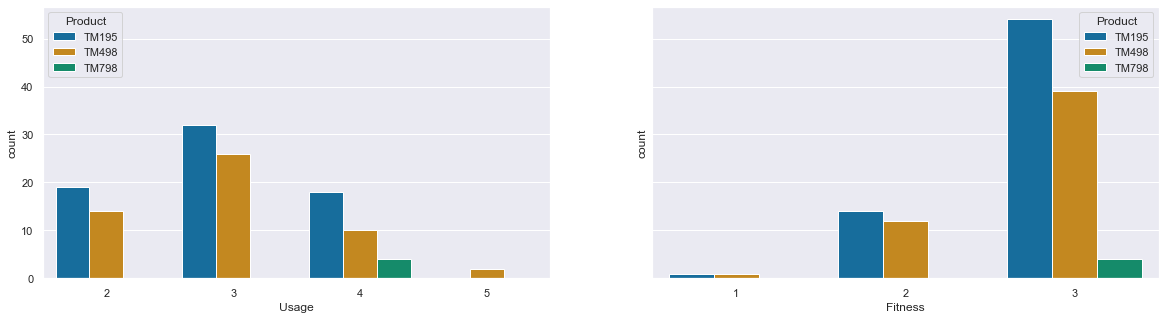

In [11]:
df2 = df[df['Fitness'] < 4]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
sns.countplot(data=df2, x='Usage', hue='Product', ax=ax[0])
sns.countplot(data=df2, x='Fitness', hue='Product', ax=ax[1])

plt.show()

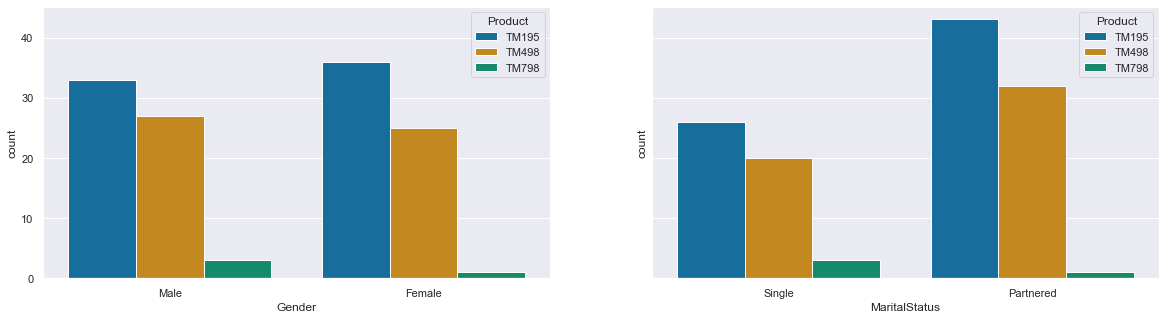

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
sns.countplot(data=df2, x='Gender', hue='Product', ax=ax[0])
sns.countplot(data=df2, x='MaritalStatus', hue='Product', ax=ax[1])

plt.show()

These charts are showing some trends, particularly about the TM798 product which appeared to be preferred by Male and/or customers with heavy usage and high Fitness level.

However, this could be affected by correlation among variables. For example, if Males tend to have higher self-reported Fitness level, TM798 could skew towards high Fitness level ONLY because more males are present (and vice versa).

We need to identify which variables correlate strong with each other before reaching other conclusions.

<AxesSubplot:xlabel='Product', ylabel='Fitness'>

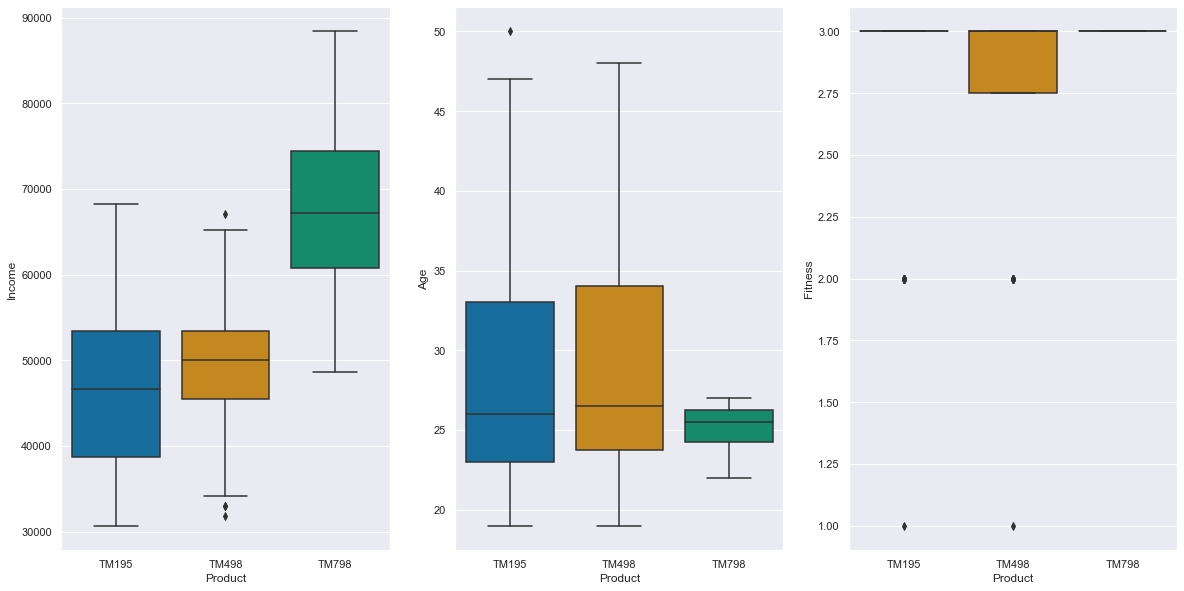

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.boxplot(x=df2['Product'], y=df2['Income'], ax=ax[0])
sns.boxplot(x=df2['Product'], y=df2['Age'], ax=ax[1])
sns.boxplot(x=df2['Product'], y=df2['Fitness'], ax=ax[2])


In [14]:
cross = pd.crosstab(df['Gender'], df['Product'])
cross['% TM195'] = 100*cross['TM195']/cross.sum(axis=1)
cross['% TM498'] = 100*cross['TM498']/cross.sum(axis=1)
cross['% TM798'] = 100*cross['TM798']/cross.sum(axis=1)
cross

Product,TM195,TM498,TM798,% TM195,% TM498,% TM798
Gender,,,,,,
Female,40,29,7,52.631579,22.545008,4.630347
Male,40,31,33,38.461538,21.760259,20.094775


In [15]:
cross2 = pd.crosstab(df['MaritalStatus'], df['Product'])
cross2['% TM195'] = 100*cross2['TM195']/cross2.sum(axis=1)
cross2['% TM498'] = 100*cross2['TM498']/cross2.sum(axis=1)
cross2['% TM798'] = 100*cross2['TM798']/cross2.sum(axis=1)
cross2

Product,TM195,TM498,TM798,% TM195,% TM498,% TM798
MaritalStatus,,,,,,
Partnered,48,36,23,44.859813,23.706074,13.100495
Single,32,24,17,43.835616,20.541681,12.374679


In [16]:
cross3 = pd.crosstab(df['Fitness'], df['Product'])
cross3['% TM195'] = 100*cross3['TM195']/cross3.sum(axis=1)
cross3['% TM498'] = 100*cross3['TM498']/cross3.sum(axis=1)
cross3['% TM798'] = 100*cross3['TM798']/cross3.sum(axis=1)
cross3

Product,TM195,TM498,TM798,% TM195,% TM498,% TM798
Fitness,,,,,,
1,1,1,0,50.000000,1.923077,0.000000
2,14,12,0,53.846154,15.028902,0.000000
3,54,39,4,55.670103,25.545277,2.244475
4,9,8,7,37.500000,13.008130,9.394948
5,2,0,29,6.451613,0.000000,77.433247


In [17]:
pd.pivot_table(df, index=['Gender', 'Product'], columns='Fitness', values='Age', aggfunc='count').fillna(0)

# We see that both for Females and Males, TM798 is preferred by customers with a high Fitness level. 
# We do note, however, that there are few data points for Females on that product, which could skew results.

Fitness           1     2     3    4     5
Gender Product                            
Female TM195    0.0  10.0  26.0  3.0   1.0
       TM498    1.0   6.0  18.0  4.0   0.0
       TM798    0.0   0.0   1.0  1.0   5.0
Male   TM195    1.0   4.0  28.0  6.0   1.0
       TM498    0.0   6.0  21.0  4.0   0.0
       TM798    0.0   0.0   3.0  6.0  24.0

### Findings so far
With this initial EDA we've identified a number of signals for products:
* TM798 is preferred by users with high Fitness level, across all gender groups
* TM195 is overall the most popular product and appears to fit the needs of low to mid Fitness levels. Women tend to have a slightly higher propensity of buying this product than Males, even when controlling for Fitness levels
* TM498 isn't very popular: High Fitness customers buy the 798, while most other customers buy the 195. Is there a niche we're not seeing? We do see that the income range for 498 buyers is more concentrated around the 50K mark, suggesting it's a more premium product.

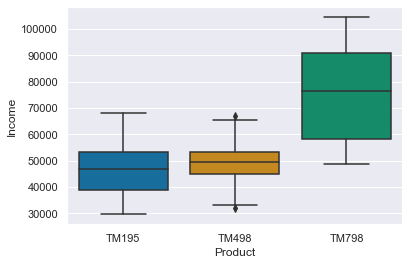

In [18]:
# Income by Product
sns.boxplot(x=df['Product'], y=df['Income'])
plt.show()

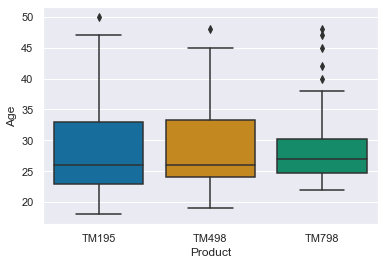

In [19]:
# Income by Product
sns.boxplot(x=df['Product'], y=df['Age'])
plt.show()

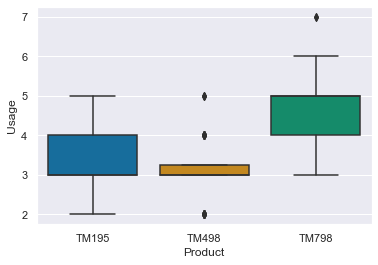

In [20]:
# Income by Product
sns.boxplot(x=df['Product'], y=df['Usage'])
plt.show()

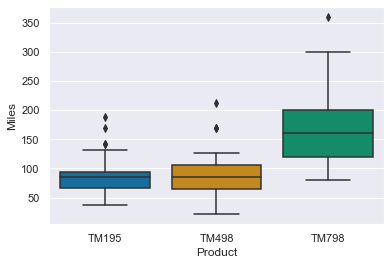

In [22]:
# Income by Product
sns.boxplot(x=df['Product'], y=df['Miles'])
plt.show()

## Conclusions

TM195 is a more wide-appeal product at likely a lower price point than is counterpart TM498.
* Customers of TM195 have a wider range of expected weekly usage than TM498
* Their income is more spread as well
* Finally their expected mileage is more narrowly concentrated around the median of ~90

Together, all these data points suggest that TM195 is a more entry level product, or for the consumer who is "testing" before committing to a potentially more expense TM498.

TM798 is the "Pro" model. It is preferred among customers with high Fitness level (regardless of gender), who expect to use the product frequently, and log a higher number of miles.

It is a more expensive product, as the income distribution suggests, with a median close to 80K.